In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import numpy as np
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import sys
sys.path.append('../')
from Core_Functions import neural_networks

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
train_images = train_images.reshape((60000, 28*28,))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000, 28*28,))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
model = neural_networks.build_DNN(28*28)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Perform k-fold cross-validation to understand the optimal number of epochs to train on
k = 4
num_val_samples = len(train_images)//k

num_epochs = 50

all_val_mae_histories = []
all_train_mae_histories = []

all_val_acc_histories = []
all_train_acc_histories = []

for i in range(k):
    
    print('processing fold #', i)
    val_data = train_images[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
    [train_images[:i * num_val_samples],
    train_images[(i+1) * num_val_samples:]],
    axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_labels[:i*num_val_samples],
    train_labels[(i+1)*num_val_samples:]],
    axis = 0)
    
    model = neural_networks.build_DNN(28*28)
    history = model.fit(partial_train_data,
              partial_train_targets,
              validation_data = (val_data, val_targets),
              epochs = num_epochs,
              batch_size = 64,
              verbose = 0)
    
    val_mae_history = history.history['val_mae']
    all_val_mae_histories.append(val_mae_history)
    
    train_mae_history = history.history['mae']
    all_train_mae_histories.append(train_mae_history)
    
    val_acc_history = history.history['val_accuracy']
    all_val_acc_histories.append(val_acc_history)
    
    train_acc_history = history.history['accuracy']
    all_train_acc_histories.append(train_acc_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


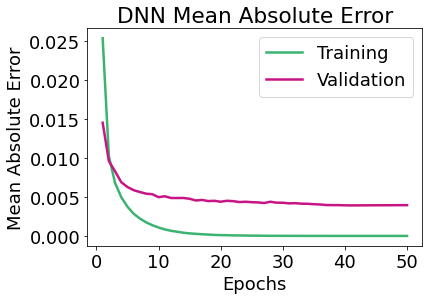

In [16]:
# Compute the average of the per-epoch MAE scores for all folds
# Building the history of successive mean K-fold validation scores

average_val_mae_history = [
    np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

average_train_mae_history = [
    np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_train_mae_history) + 1), average_train_mae_history, label = 'Training', c ='mediumseagreen', lw=2.5)
plt.plot(range(1, len(average_val_mae_history) + 1), average_val_mae_history, label='Validation', c = 'mediumvioletred', lw=2.5)

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('DNN Mean Absolute Error')
plt.savefig('Q0_Figures/Q0_DNN_MAE.png', dpi = 400, bbox_inches="tight")

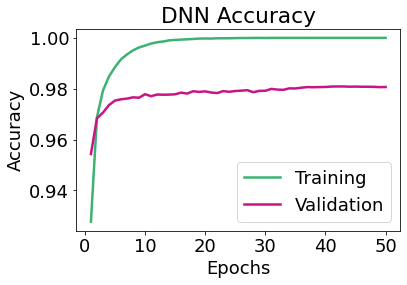

In [17]:
# Compute the average of the per-epoch Accuracy scores for all folds
# Building the history of successive mean K-fold validation scores

average_val_acc_history = [
    np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

average_train_acc_history = [
    np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_train_acc_history) + 1), average_train_acc_history, label = 'Training', c ='mediumseagreen', lw=2.5)
plt.plot(range(1, len(average_val_acc_history) + 1), average_val_acc_history, label='Validation', c = 'mediumvioletred', lw=2.5)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.title('DNN Accuracy')
plt.savefig('Q0_Figures/Q0_DNN_Accuracy.png', dpi = 400, bbox_inches="tight")

In [18]:
# Rebuild the model and train on full dataset (60k) rather than splitting it (48k)
# Do this for the optimal number of epochs
    # It seems like around 20 epochs the validation MAE and Accuracy flatten, so this will be used
model = neural_networks.build_DNN(28*28)
model.fit(train_images, train_labels, epochs = 20, batch_size = 64)

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.2238 - accuracy: 0.9349 - mae: 0.0226
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.9725 - mae: 0.0088
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0616 - accuracy: 0.9815 - mae: 0.0058
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0451 - accuracy: 0.9862 - mae: 0.0043
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0355 - accuracy: 0.9893 - mae: 0.0033
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0267 - accuracy: 0.9920 - mae: 0.0025
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0215 - accuracy: 0.9934 - mae: 0.0020
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0166 - accuracy: 0.9950 - mae: 0.0016
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0133 - accur

In [19]:
test = model.evaluate(test_images, test_labels)
test

313/313 [==============================] - 0s 795us/step - loss: 0.1365 - accuracy: 0.9813 - mae: 0.0039


[0.13650426268577576, 0.9812999963760376, 0.0038959269877523184]

In [20]:
# Serialize model to JSON
model_json = model.to_json()
with open("Q0_Trained_Models/Q0_CNN_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Q0_Trained_Models/Q0_CNN_Model.h5")
print("Saved model to disk")

Saved model to disk
